# Try to understand Average Precision

In [1]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, average_precision_score
import numpy as np

In [2]:
actual = [1,0,1,1,1,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1]
predicted = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

In [3]:
def recalls_at_k(actual, predicted):
    recalls = []

    def pr_for_rec(predicted, k):
        return predicted[:k] + np.zeros(len(predicted) - k).tolist()

    for k in range(1, len(actual) + 1):
        k_actual = actual[:k]
        k_predicted = pr_for_rec(predicted, k)
        recalls.append(
            recall_score(actual, k_predicted)
        )
    return recalls

In [4]:
def avg_precision(actual, predicted):
    precision_at_k = [precision_score(actual[:k], predicted[:k]) for k in range(1,len(actual)+1)]
    recall_at_k = recalls_at_k(actual, predicted)
    
    relevant_precisions = []
    for i in range(len(precision_at_k)):
        if i==0:
            prev_recall = 0
        else:
            prev_recall = recall_at_k[i-1]
        curr_recall = recall_at_k[i]
        delta_recall = abs(prev_recall - curr_recall)
        
        if(delta_recall > 0):
            relevant_precisions.append(precision_at_k[i])
    return np.mean(relevant_precisions)


In [5]:
def avg_precision_multiple(actual, predicted):
    precision_at_k = [precision_score(actual[:k], predicted[:k]) for k in range(1,len(actual)+1)]
    recall_at_k = recalls_at_k(actual, predicted)
    
    relevant_precisions = []
    for i in range(len(precision_at_k)):
        if i==0:
            prev_recall = 0
        else:
            prev_recall = recall_at_k[i-1]
            
        curr_recall = recall_at_k[i]
        delta_recall = abs(prev_recall - curr_recall)
        
        relevant_precisions.append(precision_at_k[i]*delta_recall)
    
    return np.sum(relevant_precisions)

In [6]:
def average_precision(actual, predicted):
    precisions = []
    for k in range(len(actual)):
        if actual[k] > 0:
            score = precision_score(actual[:k+1], predicted[:k+1])
            precisions.append(score)
            
    return np.mean(precisions)

In [7]:
def apk(actual, predicted, k=10):
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

Implementation from https://github.com/benhamner/Metrics/

In [8]:
apk(actual, predicted, k=len(actual))

0.05

My implementations

In [9]:
average_precision(actual, predicted)

0.75550505050505057

In [10]:
avg_precision_multiple(actual, predicted)

0.75550505050505046

In [11]:
avg_precision(actual, predicted)

0.75550505050505057

Implementation from sklearn

In [12]:
average_precision_score(actual, predicted)

0.5

### Try to plot PR curve

Plot PR curve by myself

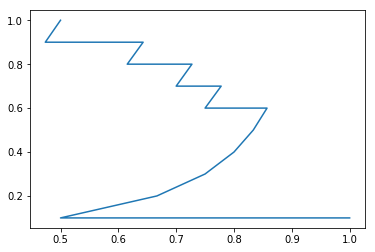

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

precision_at_k = [precision_score(actual[:k], predicted[:k]) for k in range(1,len(actual)+1)]
recall_at_k = recalls_at_k(actual, predicted)

plt.plot(precision_at_k, recall_at_k)

Using sklearn

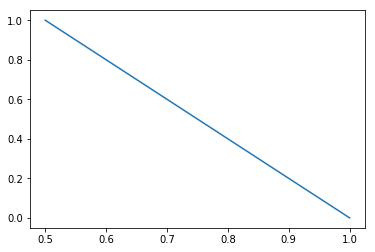

In [14]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(actual, predicted)
plt.plot(precision, recall)